In [2]:
a=5
a

5

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes'].dtype

dtype('O')

In [9]:
df['Classes'] = df['Classes'].astype(str)
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)


In [10]:
df
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
df.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [12]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


model training


In [13]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [14]:
x
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)    

In [16]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [17]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664106,-0.284285,-0.332493,0.690245,0.494657,0.398345,0.605002,0.473480,0.532604,0.272439
RH,-0.664106,1.000000,0.216906,0.216026,-0.645477,-0.399374,-0.218684,-0.682805,-0.345577,-0.447035,-0.395779
Ws,-0.284285,0.216906,1.000000,0.198263,-0.164421,-0.001988,0.051831,0.034626,0.020510,-0.015691,-0.120777
Rain,-0.332493,0.216026,0.198263,1.000000,-0.545232,-0.287017,-0.296831,-0.351914,-0.298460,-0.365089,-0.019413
FFMC,0.690245,-0.645477,-0.164421,-0.545232,1.000000,0.597528,0.500046,0.751666,0.586264,0.759940,0.180944
DMC,0.494657,-0.399374,-0.001988,-0.287017,0.597528,1.000000,0.867837,0.683809,0.981026,0.578138,0.192492
DC,0.398345,-0.218684,0.051831,-0.296831,0.500046,0.867837,1.000000,0.502461,0.937199,0.501794,-0.080379
ISI,0.605002,-0.682805,0.034626,-0.351914,0.751666,0.683809,0.502461,1.000000,0.648213,0.755806,0.258948
BUI,0.473480,-0.345577,0.020510,-0.298460,0.586264,0.981026,0.937199,0.648213,1.000000,0.580292,0.087681
Classes,0.532604,-0.447035,-0.015691,-0.365089,0.759940,0.578138,0.501794,0.755806,0.580292,1.000000,0.125855


<Axes: >

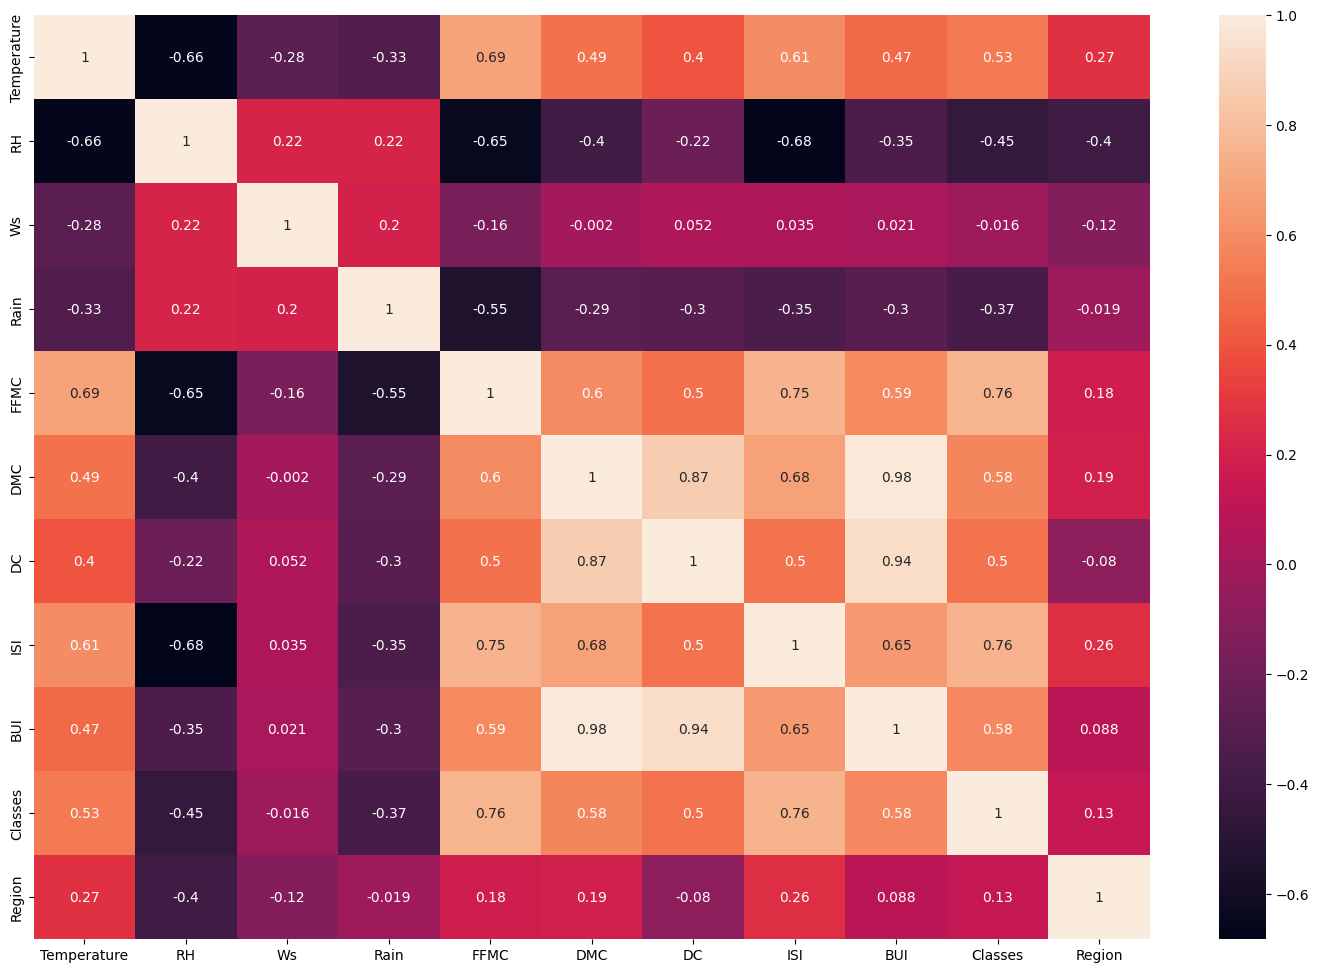

In [18]:
plt.figure(figsize=(18,12))
sns.heatmap(x_train.corr(),annot=True)

In [19]:
x_train.drop('BUI',axis=1,inplace=True)
x_test.drop('BUI',axis=1,inplace=True)

<Axes: >

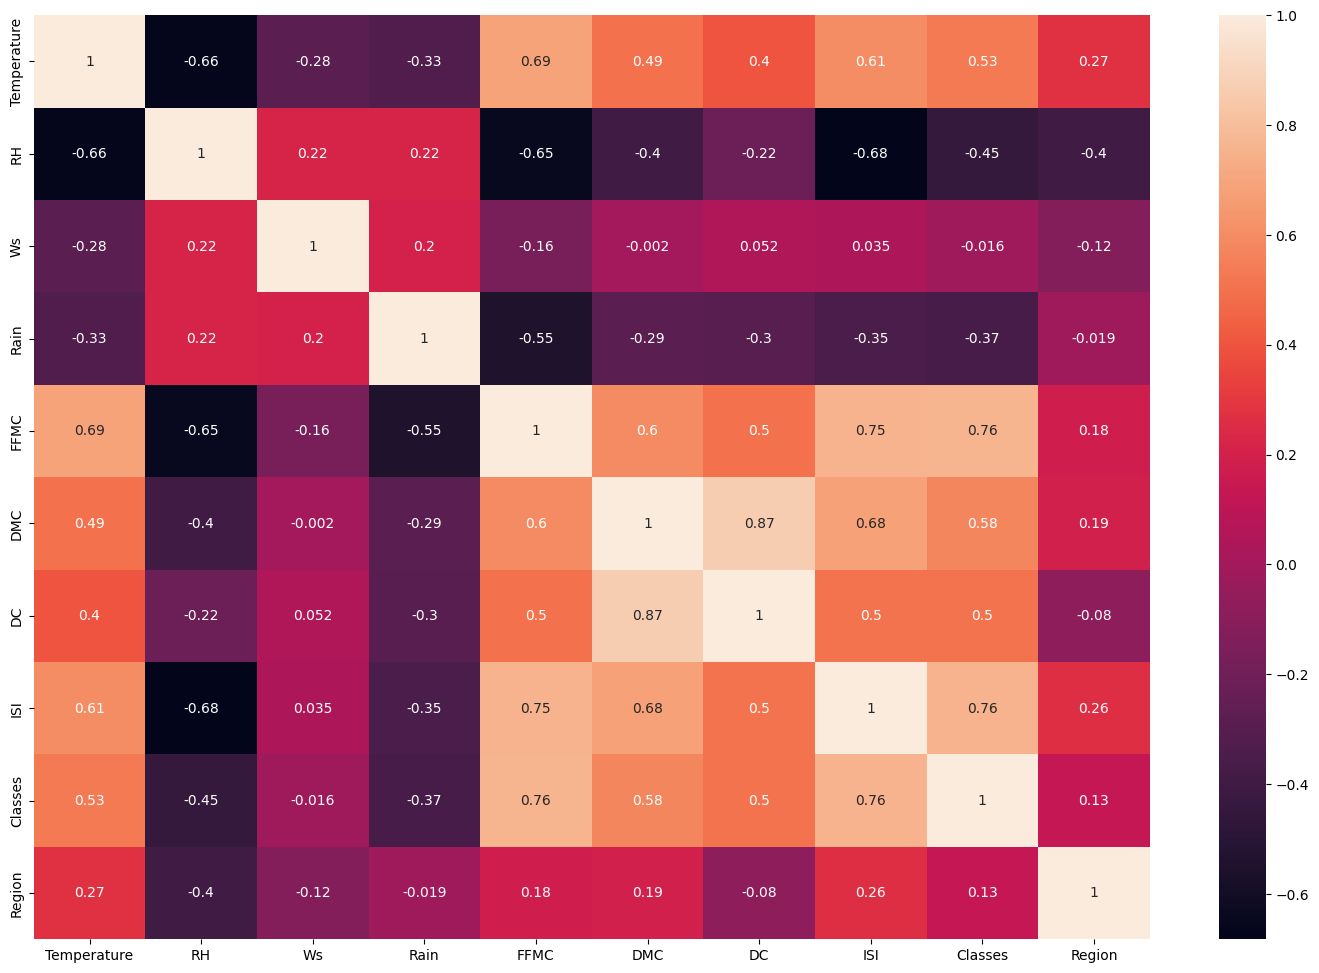

In [20]:
plt.figure(figsize=(18,12))
sns.heatmap(x_train.corr(),annot=True)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred=model.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)


In [ ]:
mae,mse,r2


(0.8303332826948047, 4.220393635834289, 0.9246648808463345)

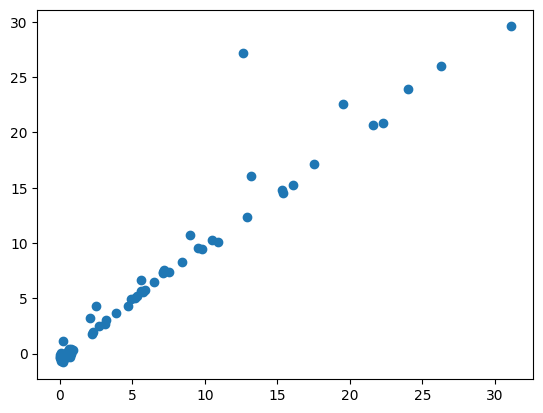

In [32]:
plt.scatter(y_test,y_pred)

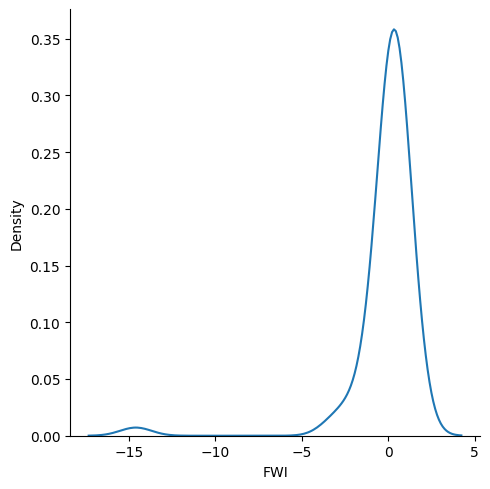

In [34]:
sns.displot(y_test-y_pred,kind='kde')

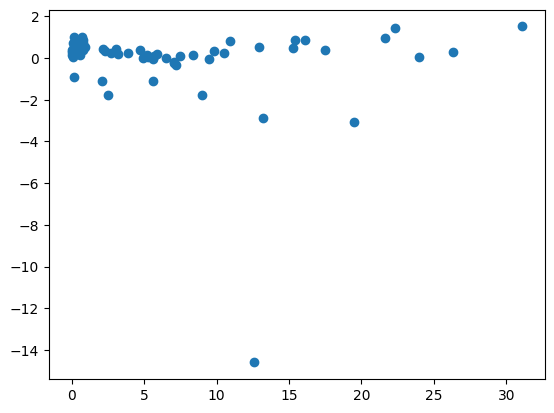

In [35]:
plt.scatter(y_test,y_test-y_pred)

In [37]:
from sklearn.linear_model import RidgeCV
ridge=RidgeCV(cv=5)
ridge.fit(x_train,y_train)
y_predridge=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_predridge)
mse=mean_squared_error(y_test,y_predridge)
r2=r2_score(y_test,y_predridge)
mae,mse,r2

(0.8310635883043397, 4.09152583402485, 0.9269652044753806)

In [38]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))